# Explanatory FordGo Bike
#### by Felipe Gonçalves

## Investigation Overview

> I am interested in analyzing the following points:
 - The counting of bike trips during the year; 
 - The average trip duration;
 - The time of the day, the day of the week, the month of the year that concentrate the most bicycle trips;
 - The user type influences the duration of the trip and the day of the trip.

## Dataset Overview

> This dataset consists of information regarding 2,5 Millions of bike trips during 
the 2019 year in San Francisco. Some columns like start_time, duration_sec, user_type, 
bike_id deserve a special attention in data analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Reading the bike_df_master.csv file
df = pd.read_csv("bike_df_master.csv")

In [3]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506982 entries, 0 to 2506981
Data columns (total 19 columns):
bike_id                    2506982 non-null int64
bike_share_for_all_trip    2386145 non-null object
duration_sec               2506982 non-null int64
end_station_id             2424081 non-null float64
end_station_latitude       2506982 non-null float64
end_station_longitude      2506982 non-null float64
end_station_name           2424633 non-null object
end_time                   2506982 non-null object
start_station_id           2426249 non-null float64
start_station_latitude     2506982 non-null float64
start_station_longitude    2506982 non-null float64
start_station_name         2426850 non-null object
start_time                 2506982 non-null object
user_type                  2506982 non-null object
start_time_hour            2506982 non-null int64
start_time_day             2506982 non-null int64
start_time_weekday         2506982 non-null object
start_time_month  

In [4]:
# Setting the user_type order: Customer left side, Subscriber right side
df["user_type"] = pd.Categorical(df["user_type"], 
                                          categories = ["Customer", "Subscriber"], 
                                          ordered = True)

## Distribution of a Bike Trip duration per each User Type
Customer user type has a lower frequency in Bike trips when we compare with Subscriber user type, however, the duration of the trips is higher in Customer group.
- Customer: 22.55 minutes on average
- Subscriber: 11.27 minutes on average

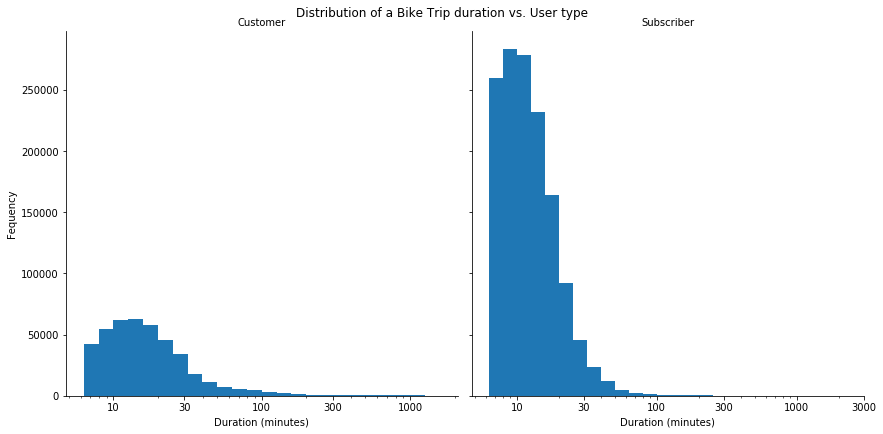

In [5]:
bin_edges = 10 ** np.arange(0.8, np.log10(df["duration_min"].max()) + 0.1, 0.1)
g = sb.FacetGrid(data = df, col = "user_type", height = 6)
g.map(plt.hist, "duration_min", bins = bin_edges)
g.fig.suptitle("Distribution of a Bike Trip duration vs. User type", y = 1.00)
g.set_axis_labels("Duration (minutes)", "Fequency")
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs)
g.set_titles('{col_name}');

## Bike trips count per User Type
The Subscribers are the most users of the public bicycle sharing system.
- Customer: 500,00 bike trips in a year
- Subscriber: 2,000,000 bike trips in a year

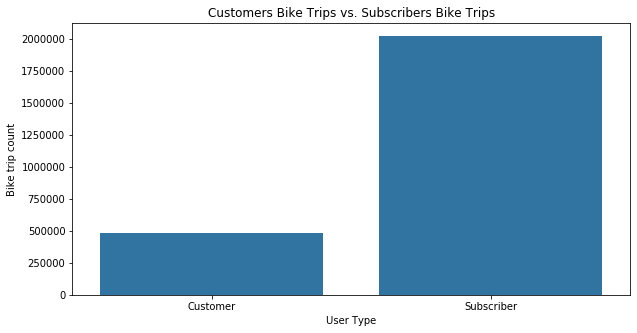

In [6]:
plt.figure(figsize = (10,5))
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = "user_type", color = base_color)
plt.title("Customers Bike Trips vs. Subscribers Bike Trips")
plt.xlabel("User Type")
plt.ylabel("Bike trip count");

## Monthly usage of bike per User Type

The Customer user type has more bike trips count in December. While the Subscriber user type has more bike trips recorded in March.

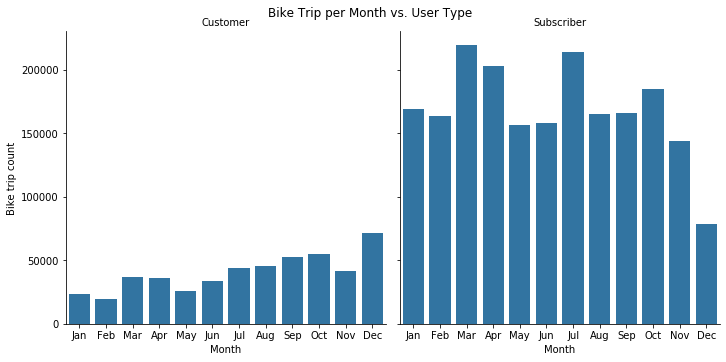

In [7]:
base_color = sb.color_palette()[0]
order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
g = sb.catplot(data = df, x = "start_time_month", col = "user_type", 
               kind = "count", sharey = True, color = base_color, order = order)
g.fig.suptitle("Bike Trip per Month vs. User Type", y = 1)
g.set_axis_labels("Month", "Bike trip count")
g.set_titles("{col_name}");

## Stripplot: Trip duration vs. Hourly usage of Bike vs. User Type 

Although hour 8 and hour 17 have the peak of use, the longest trips happen between hour 16 and hour 19 of the day. The Subscriber user type appears with the shortest bike trips, while the Customer has the longest trips.

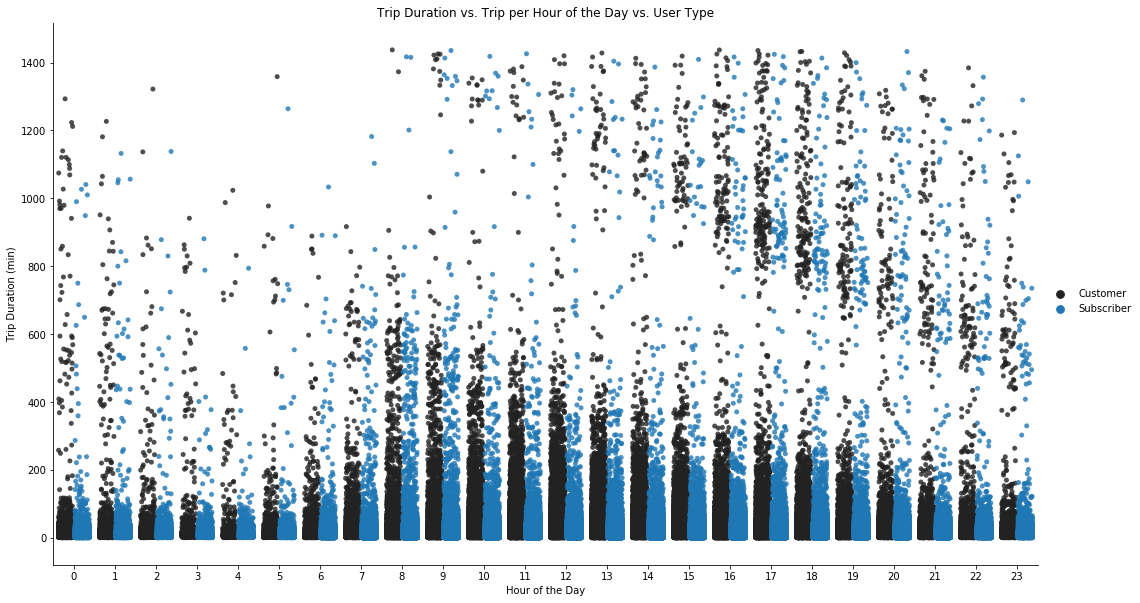

In [8]:
g = sb.FacetGrid(data = df, height = 8.27, aspect = 14.70/8.27)
g.map(sb.stripplot, "start_time_hour", "duration_min", "user_type", jitter = 0.35, dodge = True, alpha = 0.8)
g.add_legend()
plt.title("Trip Duration vs. Trip per Hour of the Day vs. User Type")
plt.xlabel("Hour of the Day")
plt.ylabel("Trip Duration (min)");

In [9]:
# Setting the correct weekday order
df["start_time_weekday"] = pd.Categorical(df["start_time_weekday"], 
                                          categories = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], 
                                          ordered = True)

## Heatmap: Trip per Weekday vs. Trip per Hour of the Day vs. User type
Analyzing the behavior of the Customer user type, we can see that the most bike trips happen in hour 17, hour 18 and hour 8 during the weekdays. In the weekend, the hour with the peak of bike trips is 14 o'clock in Saturday and between hour 13 and hour 15 in Sunday.
- The Customer user type uses bike directed to entertainment and turism.

The Subscriber user type uses the bike during the weekdays with the peak recorded in hour 8 and hour 17. Although the weekend shows low utilization. It is worth noting that the Subscriber scale of bike trips is different than Customer scale. The lower value in Subscriber scale (10,000) is higher than the top value in Customer scale (9,000).
- The Subscriber user type uses bicycles daily to go to work / school.

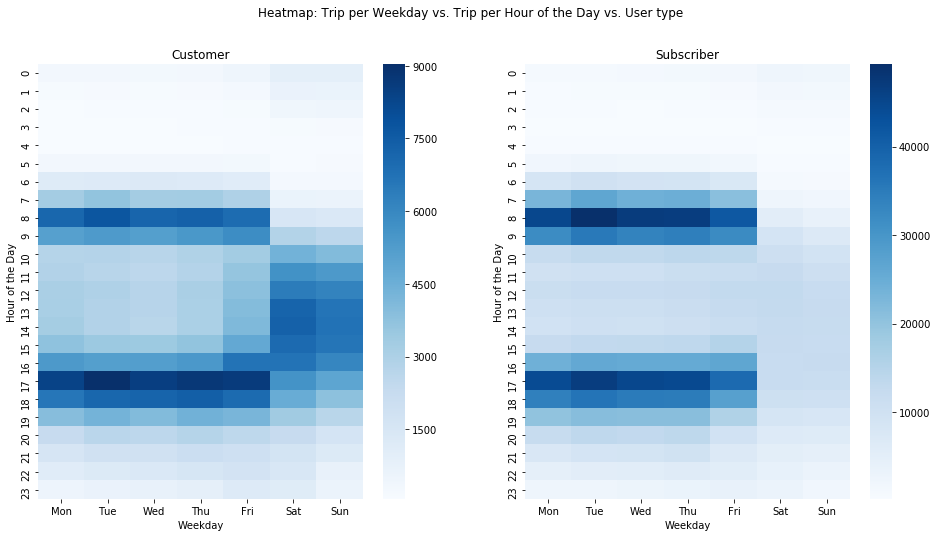

In [10]:
plt.figure(figsize = (16,8))
plt.suptitle('Heatmap: Trip per Weekday vs. Trip per Hour of the Day vs. User type')

plt.subplot(1, 2, 1)
df_customer = df.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap = "Blues")
plt.title("Customer")
plt.xlabel("Weekday")
plt.ylabel("Hour of the Day");

plt.subplot(1, 2, 2)
df_subscriber = df.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap = "Blues")
plt.title("Subscriber")
plt.xlabel("Weekday")
plt.ylabel("Hour of the Day");

## Conclusion

Understand the user behavior is essential to expand the system and make it better.

The Customer user type is a casual member in bicycle sharing system. He has a lower frequency in 
bike trips, but with longer trips durations (22.55 minutes on average). The Customer user type has 
more bike trips count in Friday and Saturday than other day in a week. December is the month with 
more Customer trips. The Customer user type uses bike directed to entertainment and turism.

The Subscriber user type is a permanent member in bicycle sharing system. He shows a higher 
frequency in bike trips, but with shorter trips duration (11.27 minutes on average). The Subscriber 
user type has more bike trips recorded in Tuesday, Thursday and Wedesnday. March is the month with 
more Subscriber trips. The Subscriber user type uses bicycles daily to go to work / school. 
Although hour 8 and hour 17 have the peak daily usage for both user types, the longest trips 
happen between hour 16 and hour 19 of the day.

In [ ]:
!jupyter nbconvert Slide_deck-FordGo-Bike.ipynb --to slides --post serve --template output_toggle